1. Importar librerías y .csv. (2 punto) para ello:
-  Importe las librerías básicas para el análisis de datos
-  Descargue e importe el archivo nations.csv

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={'figure.figsize':(12, 6)})

In [83]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1')

In [84]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    # Esto al final genera 2 poblaciones de datos, los que estan sobre la media (1), y los que estan
    # igual o bajo la media (0).
    # Ademas, obtiene los datos asociados a 1 y 0
    grid = sns.FacetGrid(tmp, col='binarize', sharex=False, sharey=False)
    grid.map(sns.histplot, variable, color='lightgrey', alpha=0.6)

    grid.axes[0][0].axvline(np.mean(hist_0))
    grid.axes[0][0].title.set_text(f'{variable} <= {np.mean(tmp[variable]):.2f}')

    grid.axes[0][1].axvline(np.mean(hist_1))
    grid.axes[0][1].title.set_text(f'{variable} > {np.mean(tmp[variable]):.2f}')

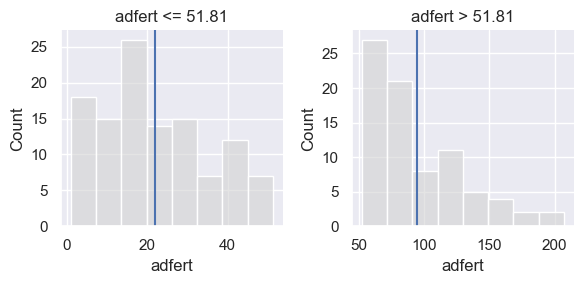

In [85]:
binarize_histogram(df, 'adfert')

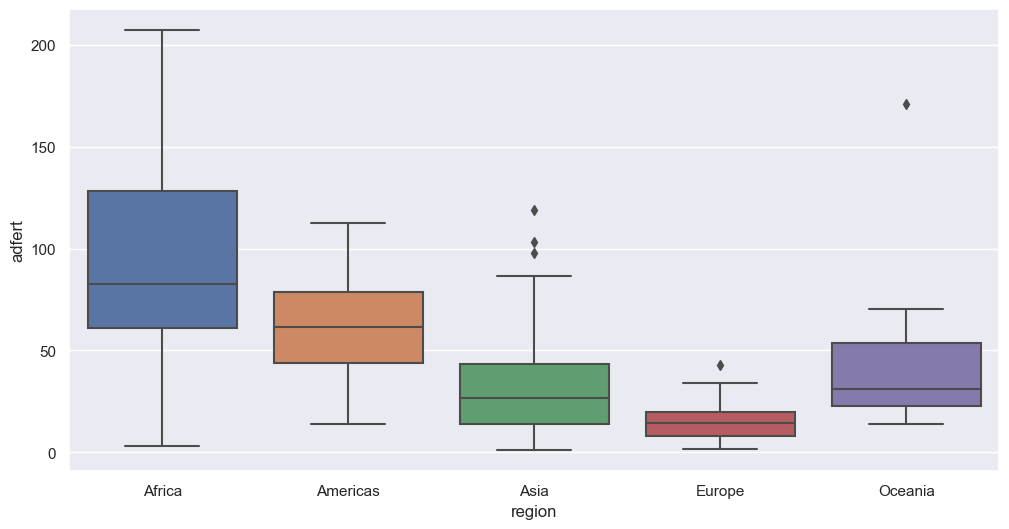

In [86]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    sns.boxplot(data=tmp, x=group_by, y=variable)

grouped_boxplot(df, 'adfert', 'region')
